### Last digit of the name in label data is the target label 

In [1]:
import os
print(len(os.listdir('data')))

76


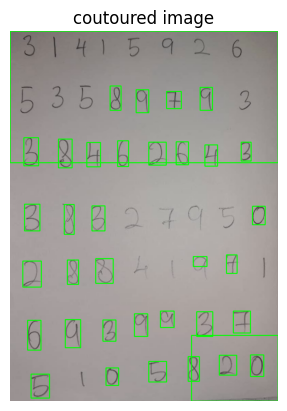

In [11]:
from utils import *
import cv2
rel_dir = 'raw image'
filename = 'wa3.jpeg'

img = cv2.imread(f'{rel_dir}/{filename}')
digits = crop_number(img.copy(), True)

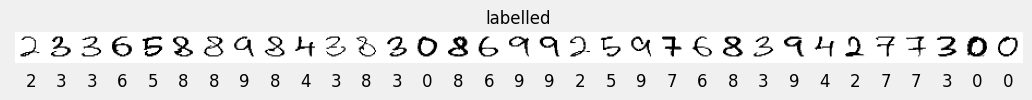

In [12]:
remaining_digits, labels = manual_label(digits)

In [13]:
save_label_digit(remaining_digits, labels)